In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Установка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Библиотеки импортированы")

✓ Библиотеки импортированы


## 1. Загрузка данных

Загружаем обработанный датасет с информацией об аниме из предыдущих лабораторных работ.

In [2]:
# Загрузка данных
df = pd.read_csv('../data/processed/anime_processed.csv')

print(f"Размер датасета: {df.shape}")
print(f"\nПервые строки:")
df.head()

Размер датасета: (24718, 24)

Первые строки:


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,1998-04-03,...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,2001-09-01,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,1998-04-01,...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,2002-07-03,...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,2004-09-30,...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [3]:
# Информация о данных
print("Информация о датасете:")
df.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24718 entries, 0 to 24717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      24718 non-null  int64  
 1   Name          24718 non-null  object 
 2   English name  24718 non-null  object 
 3   Other name    24718 non-null  object 
 4   Score         24718 non-null  float64
 5   Genres        24718 non-null  object 
 6   Synopsis      24718 non-null  object 
 7   Type          24718 non-null  object 
 8   Episodes      24718 non-null  float64
 9   Aired         19958 non-null  object 
 10  Premiered     24718 non-null  object 
 11  Status        24718 non-null  object 
 12  Producers     24718 non-null  object 
 13  Licensors     24718 non-null  object 
 14  Studios       24718 non-null  object 
 15  Source        24718 non-null  object 
 16  Duration      24718 non-null  object 
 17  Rating        24718 non-null  object 
 18  Ran

In [4]:
# Статистика
print("Статистическое описание:")
df.describe()

Статистическое описание:


,anime_id,Score,Episodes,Rank,Popularity,Favorites,Scored By,Members
count,24718.00000,24718.000000,24718.000000,24718.000000,24718.000000,24718.000000,2.471800e+04,2.471800e+04
mean,29586.53985,6.384216,14.657780,10035.609879,12358.180152,435.862448,1.967164e+04,3.738567e+04
std,17909.56370,0.739961,48.196742,5235.142215,7134.646262,4369.455223,9.415412e+04,1.573840e+05
min,1.00000,1.850000,1.000000,1.000000,1.000000,0.000000,1.000000e+02,0.000000e+00
25%,10396.25000,6.130000,1.000000,6179.250000,6180.250000,0.000000,8.942500e+02,2.190000e+02
50%,34439.50000,6.390000,2.000000,9958.000000,12358.500000,1.000000,1.760000e+03,1.089000e+03
75%,45035.75000,6.640000,13.000000,13928.750000,18536.000000,18.000000,3.411000e+03,9.487750e+03
max,55731.00000,9.100000,3057.000000,20104.000000,24723.000000,217606.000000,2.660903e+06,3.744541e+06


## 2. Подготовка признаков для моделирования

Выбираем целевую переменную (Score - рейтинг) и признаки для обучения модели.

In [5]:
# Целевая переменная - Score (рейтинг)
target = 'Score'

# Отбираем только те строки, где есть Score
df_model = df[df[target].notna()].copy()

print(f"Количество записей с известным рейтингом: {len(df_model)}")

Количество записей с известным рейтингом: 24718


In [6]:
# Выбираем признаки для моделирования

# Числовые признаки
numeric_features = ['Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']

# Категориальные признаки
categorical_features = ['Type', 'Status', 'Source', 'Rating']

print(f"Числовые признаки ({len(numeric_features)}): {numeric_features}")
print(f"Категориальные признаки ({len(categorical_features)}): {categorical_features}")

Числовые признаки (6): ['Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']
Категориальные признаки (4): ['Type', 'Status', 'Source', 'Rating']


## 3. Обработка пропущенных значений

Проверяем наличие пропусков и заполняем их подходящими значениями.

In [7]:
# Проверяем пропуски в числовых признаках
print("Пропуски в числовых признаках:")
for col in numeric_features:
    missing = df_model[col].isna().sum()
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(df_model)*100:.2f}%)")
        # Заполняем медианой
        df_model[col].fillna(df_model[col].median(), inplace=True)

print("\nПропуски в категориальных признаках:")
for col in categorical_features:
    missing = df_model[col].isna().sum()
    if missing > 0:
        print(f"  {col}: {missing} ({missing/len(df_model)*100:.2f}%)")
        # Заполняем модой (наиболее частым значением)
        df_model[col].fillna(df_model[col].mode()[0], inplace=True)

print("\n✓ Пропуски обработаны")

Пропуски в числовых признаках:

Пропуски в категориальных признаках:

✓ Пропуски обработаны


## 4. Кодирование категориальных признаков

### Что такое кодирование категориальных признаков?

Машинное обучение работает с числами, поэтому категориальные (текстовые) признаки нужно преобразовать в числовой формат.

**Используем два метода:**
- **LabelEncoder**: для порядковых признаков (например, Rating: G < PG < PG-13 < R)
- **One-Hot Encoding**: для номинальных признаков (например, Type: TV, Movie, OVA) - создаёт отдельную колонку для каждого значения (0 или 1)

In [8]:
# Для Rating используем LabelEncoder (есть порядок)
rating_order = ['G - All Ages', 'PG - Children', 'PG-13 - Teens 13 or older', 
                'R - 17+ (violence & profanity)', 'R+ - Mild Nudity', 'Rx - Hentai']
le_rating = LabelEncoder()
le_rating.fit(rating_order)
df_model['Rating_encoded'] = df_model['Rating'].apply(
    lambda x: le_rating.transform([x])[0] if x in rating_order else -1
)

print("Кодирование Rating (LabelEncoder):")
for i, val in enumerate(rating_order):
    print(f"  {val} -> {i}")

Кодирование Rating (LabelEncoder):
  G - All Ages -> 0
  PG - Children -> 1
  PG-13 - Teens 13 or older -> 2
  R - 17+ (violence & profanity) -> 3
  R+ - Mild Nudity -> 4
  Rx - Hentai -> 5


In [10]:
# Для остальных категориальных признаков используем One-Hot Encoding
categorical_to_encode = ['Type', 'Status', 'Source']

# Применяем One-Hot Encoding
df_encoded = pd.get_dummies(df_model, columns=categorical_to_encode, prefix=categorical_to_encode)

print(f"\nOne-Hot Encoding применен к: {categorical_to_encode}")
print(f"Количество признаков после кодирования: {df_encoded.shape[1]}")


One-Hot Encoding применен к: ['Type', 'Status', 'Source']
Количество признаков после кодирования: 49


In [11]:
# Формирование итогового набора признаков
feature_columns = numeric_features + ['Rating_encoded']

# Добавляем все One-Hot encoded колонки
one_hot_columns = [col for col in df_encoded.columns 
                   if any(col.startswith(prefix + '_') for prefix in categorical_to_encode)]
feature_columns.extend(one_hot_columns)

X = df_encoded[feature_columns]
y = df_encoded[target]

print(f"Итоговое количество признаков: {len(feature_columns)}")
print(f"Размер X: {X.shape}, размер y: {y.shape}")

Итоговое количество признаков: 34
Размер X: (24718, 34), размер y: (24718,)


## 5. Нормализация и стандартизация числовых признаков

### Что такое стандартизация?

**Стандартизация (StandardScaler)**:
- Преобразует данные так, чтобы среднее = 0, стандартное отклонение = 1
- Формула: z = (x - μ) / σ

**Зачем это нужно?**
- Признаки имеют разный масштаб (например, Episodes: 1-1000, Score: 1-10, Members: 0-3M)
- Некоторые алгоритмы (линейная регрессия, градиентный спуск) чувствительны к масштабу
- Ускоряет обучение и улучшает качество моделей

In [12]:
# Применяем StandardScaler
scaler = StandardScaler()

# Важно: масштабируем только числовые признаки, закодированные категориальные не трогаем
numeric_indices = [feature_columns.index(col) for col in numeric_features]

X_scaled = X.copy()
X_scaled.iloc[:, numeric_indices] = scaler.fit_transform(X.iloc[:, numeric_indices])

print("Стандартизация применена к числовым признакам:")
print(f"  {numeric_features}")
print(f"\nПример (первые 5 строк):")
print("\nДо стандартизации:")
print(X[numeric_features].head())
print("\nПосле стандартизации:")
print(X_scaled[numeric_features].head())

Стандартизация применена к числовым признакам:
  ['Episodes', 'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members']

Пример (первые 5 строк):

До стандартизации:
   Episodes    Rank  Popularity  Favorites  Scored By  Members
0      26.0    41.0          43      78525   914193.0  1771505
1       1.0   189.0         602       1448   206248.0   360978
2      26.0   328.0         246      15035   356739.0   727252
3      26.0  2764.0        1795        613    42829.0   111931
4      52.0  4240.0        5126         14     6413.0    15001

После стандартизации:
   Episodes      Rank  Popularity  Favorites  Scored By    Members
0  0.235336 -1.909177   -1.726144  17.871957   9.500800  11.018618
1 -0.283381 -1.880906   -1.647793   0.231644   1.981646   2.056110
2  0.235336 -1.854354   -1.697691   3.341248   3.580026   4.383420
3  0.235336 -1.389028   -1.480577   0.040541   0.245957   0.473662
4  0.774803 -1.107081   -1.013691  -0.096550  -0.140821  -0.142233


## 6. Разделение данных на обучающую и тестовую выборки

Разделяем данные:
- **80%** - обучающая выборка (для обучения моделей)
- **20%** - тестовая выборка (для оценки качества)
- `random_state=42` для воспроизводимости результатов

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"\nРаспределение целевой переменной (Score):")
print(f"  Train: mean={y_train.mean():.2f}, std={y_train.std():.2f}, min={y_train.min():.2f}, max={y_train.max():.2f}")
print(f"  Test:  mean={y_test.mean():.2f}, std={y_test.std():.2f}, min={y_test.min():.2f}, max={y_test.max():.2f}")

Размер обучающей выборки: (19774, 34)
Размер тестовой выборки: (4944, 34)

Распределение целевой переменной (Score):
  Train: mean=6.39, std=0.74, min=1.85, max=9.10
  Test:  mean=6.37, std=0.74, min=2.22, max=9.06


## 7. Обучение и сравнение моделей

Обучаем 4 модели машинного обучения для сравнения качества предсказаний.

In [14]:
# Словарь для хранения результатов
results = {}

### Модель 1: Линейная регрессия

Линейная регрессия - простая модель, предполагающая линейную зависимость между признаками и целевой переменной:

**y = w₁×x₁ + w₂×x₂ + ... + b**

In [15]:
print("Обучение модели: Linear Regression")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказания
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Метрики
lr_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
lr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
lr_mae_train = mean_absolute_error(y_train, y_pred_train_lr)
lr_mae_test = mean_absolute_error(y_test, y_pred_test_lr)
lr_r2_train = r2_score(y_train, y_pred_train_lr)
lr_r2_test = r2_score(y_test, y_pred_test_lr)

print(f"RMSE: Train={lr_rmse_train:.4f}, Test={lr_rmse_test:.4f}")
print(f"MAE:  Train={lr_mae_train:.4f}, Test={lr_mae_test:.4f}")
print(f"R²:   Train={lr_r2_train:.4f}, Test={lr_r2_test:.4f}")

results['Linear Regression'] = {
    'model': lr_model,
    'rmse_train': lr_rmse_train, 'rmse_test': lr_rmse_test,
    'mae_train': lr_mae_train, 'mae_test': lr_mae_test,
    'r2_train': lr_r2_train, 'r2_test': lr_r2_test,
    'predictions': y_pred_test_lr
}

Обучение модели: Linear Regression
RMSE: Train=0.5848, Test=0.5957
MAE:  Train=0.4447, Test=0.4536
R²:   Train=0.3751, Test=0.3535


### Модель 2: Дерево решений

Дерево решений - модель, которая разбивает пространство признаков на области с помощью последовательности условий (if-then-else).

In [16]:
print("Обучение модели: Decision Tree")

dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

dt_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))
dt_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))
dt_mae_train = mean_absolute_error(y_train, y_pred_train_dt)
dt_mae_test = mean_absolute_error(y_test, y_pred_test_dt)
dt_r2_train = r2_score(y_train, y_pred_train_dt)
dt_r2_test = r2_score(y_test, y_pred_test_dt)

print(f"RMSE: Train={dt_rmse_train:.4f}, Test={dt_rmse_test:.4f}")
print(f"MAE:  Train={dt_mae_train:.4f}, Test={dt_mae_test:.4f}")
print(f"R²:   Train={dt_r2_train:.4f}, Test={dt_r2_test:.4f}")

results['Decision Tree'] = {
    'model': dt_model,
    'rmse_train': dt_rmse_train, 'rmse_test': dt_rmse_test,
    'mae_train': dt_mae_train, 'mae_test': dt_mae_test,
    'r2_train': dt_r2_train, 'r2_test': dt_r2_test,
    'predictions': y_pred_test_dt
}

Обучение модели: Decision Tree
RMSE: Train=0.1627, Test=0.1944
MAE:  Train=0.0486, Test=0.0530
R²:   Train=0.9516, Test=0.9312


### Модель 3: Random Forest

Random Forest - ансамбль деревьев решений, где каждое дерево обучается на случайной подвыборке данных и признаков. Финальное предсказание - среднее по всем деревьям.

In [17]:
print("Обучение модели: Random Forest")

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, 
                                  random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

rf_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
rf_mae_train = mean_absolute_error(y_train, y_pred_train_rf)
rf_mae_test = mean_absolute_error(y_test, y_pred_test_rf)
rf_r2_train = r2_score(y_train, y_pred_train_rf)
rf_r2_test = r2_score(y_test, y_pred_test_rf)

print(f"RMSE: Train={rf_rmse_train:.4f}, Test={rf_rmse_test:.4f}")
print(f"MAE:  Train={rf_mae_train:.4f}, Test={rf_mae_test:.4f}")
print(f"R²:   Train={rf_r2_train:.4f}, Test={rf_r2_test:.4f}")

results['Random Forest'] = {
    'model': rf_model,
    'rmse_train': rf_rmse_train, 'rmse_test': rf_rmse_test,
    'mae_train': rf_mae_train, 'mae_test': rf_mae_test,
    'r2_train': rf_r2_train, 'r2_test': rf_r2_test,
    'predictions': y_pred_test_rf
}

Обучение модели: Random Forest
RMSE: Train=0.1217, Test=0.1689
MAE:  Train=0.0335, Test=0.0425
R²:   Train=0.9729, Test=0.9480
RMSE: Train=0.1217, Test=0.1689
MAE:  Train=0.0335, Test=0.0425
R²:   Train=0.9729, Test=0.9480


### Модель 4: Gradient Boosting

Gradient Boosting - ансамбль деревьев, где каждое новое дерево обучается исправлять ошибки предыдущих деревьев.

In [18]:
print("Обучение модели: Gradient Boosting")

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1,
                                      random_state=42)
gb_model.fit(X_train, y_train)

y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

gb_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_gb))
gb_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))
gb_mae_train = mean_absolute_error(y_train, y_pred_train_gb)
gb_mae_test = mean_absolute_error(y_test, y_pred_test_gb)
gb_r2_train = r2_score(y_train, y_pred_train_gb)
gb_r2_test = r2_score(y_test, y_pred_test_gb)

print(f"RMSE: Train={gb_rmse_train:.4f}, Test={gb_rmse_test:.4f}")
print(f"MAE:  Train={gb_mae_train:.4f}, Test={gb_mae_test:.4f}")
print(f"R²:   Train={gb_r2_train:.4f}, Test={gb_r2_test:.4f}")

results['Gradient Boosting'] = {
    'model': gb_model,
    'rmse_train': gb_rmse_train, 'rmse_test': gb_rmse_test,
    'mae_train': gb_mae_train, 'mae_test': gb_mae_test,
    'r2_train': gb_r2_train, 'r2_test': gb_r2_test,
    'predictions': y_pred_test_gb
}

Обучение модели: Gradient Boosting
RMSE: Train=0.1376, Test=0.1692
MAE:  Train=0.0456, Test=0.0520
R²:   Train=0.9654, Test=0.9478
RMSE: Train=0.1376, Test=0.1692
MAE:  Train=0.0456, Test=0.0520
R²:   Train=0.9654, Test=0.9478


## 8. Сводная таблица результатов

### Объяснение метрик:

**RMSE (Root Mean Squared Error)** - корень из среднеквадратичной ошибки
- Показывает среднюю ошибку предсказаний в тех же единицах, что и целевая переменная
- Чувствителен к выбросам (большие ошибки влияют сильнее)
- Чем меньше, тем лучше

**MAE (Mean Absolute Error)** - средняя абсолютная ошибка
- Показывает среднее отклонение предсказаний от реальных значений
- Менее чувствителен к выбросам, чем RMSE
- Чем меньше, тем лучше

**R² (коэффициент детерминации)**
- Показывает, какую долю дисперсии целевой переменной объясняет модель
- Значения от 0 до 1 (может быть отрицательным для плохих моделей)
- 1 = идеальная модель, 0 = модель не лучше среднего значения
- Чем ближе к 1, тем лучше

In [19]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE_Train': [results[m]['rmse_train'] for m in results.keys()],
    'RMSE_Test': [results[m]['rmse_test'] for m in results.keys()],
    'MAE_Train': [results[m]['mae_train'] for m in results.keys()],
    'MAE_Test': [results[m]['mae_test'] for m in results.keys()],
    'R2_Train': [results[m]['r2_train'] for m in results.keys()],
    'R2_Test': [results[m]['r2_test'] for m in results.keys()],
})

print("Сравнение всех моделей:")
comparison_df

Сравнение всех моделей:


,Model,RMSE_Train,RMSE_Test,MAE_Train,MAE_Test,R2_Train,R2_Test
0,Linear Regression,0.584754,0.595663,0.444749,0.453618,0.375069,0.353483
1,Decision Tree,0.162750,0.194376,0.048604,0.052980,0.951591,0.931156
2,Random Forest,0.121664,0.168938,0.033466,0.042481,0.972947,0.947997
3,Gradient Boosting,0.137567,0.169209,0.045585,0.052036,0.965413,0.947829


In [20]:
# Сохраняем результаты
comparison_df.to_csv('results_full_features.csv', index=False)
print("✓ Результаты сохранены в 'results_full_features.csv'")

✓ Результаты сохранены в 'results_full_features.csv'


## 9. Кросс-валидация

Кросс-валидация - метод оценки качества модели, при котором данные разбиваются на K частей (фолдов). Модель обучается K раз, каждый раз используя K-1 частей для обучения и 1 часть для валидации.

Это даёт более надёжную оценку качества модели.

In [21]:
cv_results = {}

for name, result in results.items():
    model = result['model']
    # 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                                 scoring='neg_mean_squared_error', n_jobs=-1)
    cv_rmse = np.sqrt(-cv_scores)
    cv_results[name] = {
        'mean_cv_rmse': cv_rmse.mean(),
        'std_cv_rmse': cv_rmse.std()
    }
    print(f"{name}:")
    print(f"  CV RMSE: {cv_rmse.mean():.4f} (+/- {cv_rmse.std():.4f})")

Linear Regression:
  CV RMSE: 0.5856 (+/- 0.0121)
Decision Tree:
  CV RMSE: 0.1798 (+/- 0.0074)
Decision Tree:
  CV RMSE: 0.1798 (+/- 0.0074)
Random Forest:
  CV RMSE: 0.1618 (+/- 0.0072)
Random Forest:
  CV RMSE: 0.1618 (+/- 0.0072)
Gradient Boosting:
  CV RMSE: 0.1638 (+/- 0.0079)
Gradient Boosting:
  CV RMSE: 0.1638 (+/- 0.0079)


## 10. Анализ важности признаков

Для Random Forest можем посмотреть, какие признаки наиболее важны для предсказания рейтинга.

In [22]:
# Для Random Forest можем посмотреть важность признаков
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Топ-15 наиболее важных признаков:")
feature_importance.head(15)

Топ-15 наиболее важных признаков:


,feature,importance
1,Rank,0.786474
4,Scored By,0.157376
5,Members,0.013195
3,Favorites,0.012546
8,Type_Music,0.007497
6,Rating_encoded,0.006781
2,Popularity,0.006158
24,Source_Music,0.002451
0,Episodes,0.001908
30,Source_Unknown,0.001475


In [23]:
# Сохраняем важность признаков
feature_importance.to_csv('feature_importance_full.csv', index=False)
print("✓ Важность признаков сохранена")

✓ Важность признаков сохранена


## 11. Визуализация результатов

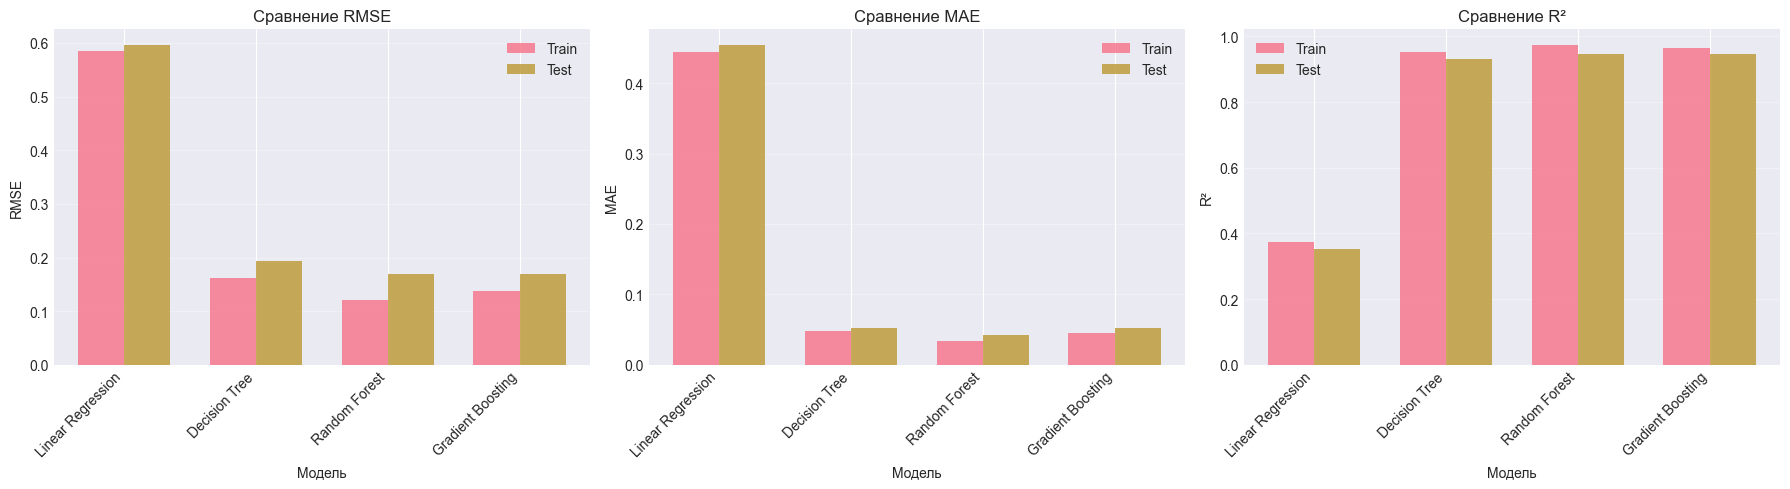

✓ График сохранен


In [24]:
# График 1: Сравнение метрик
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = list(results.keys())
rmse_train = [results[m]['rmse_train'] for m in models]
rmse_test = [results[m]['rmse_test'] for m in models]
mae_train = [results[m]['mae_train'] for m in models]
mae_test = [results[m]['mae_test'] for m in models]
r2_train = [results[m]['r2_train'] for m in models]
r2_test = [results[m]['r2_test'] for m in models]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, rmse_train, width, label='Train', alpha=0.8)
axes[0].bar(x + width/2, rmse_test, width, label='Test', alpha=0.8)
axes[0].set_xlabel('Модель')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Сравнение RMSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(x - width/2, mae_train, width, label='Train', alpha=0.8)
axes[1].bar(x + width/2, mae_test, width, label='Test', alpha=0.8)
axes[1].set_xlabel('Модель')
axes[1].set_ylabel('MAE')
axes[1].set_title('Сравнение MAE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

axes[2].bar(x - width/2, r2_train, width, label='Train', alpha=0.8)
axes[2].bar(x + width/2, r2_test, width, label='Test', alpha=0.8)
axes[2].set_xlabel('Модель')
axes[2].set_ylabel('R²')
axes[2].set_title('Сравнение R²')
axes[2].set_xticks(x)
axes[2].set_xticklabels(models, rotation=45, ha='right')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('comparison_metrics_full.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранен")

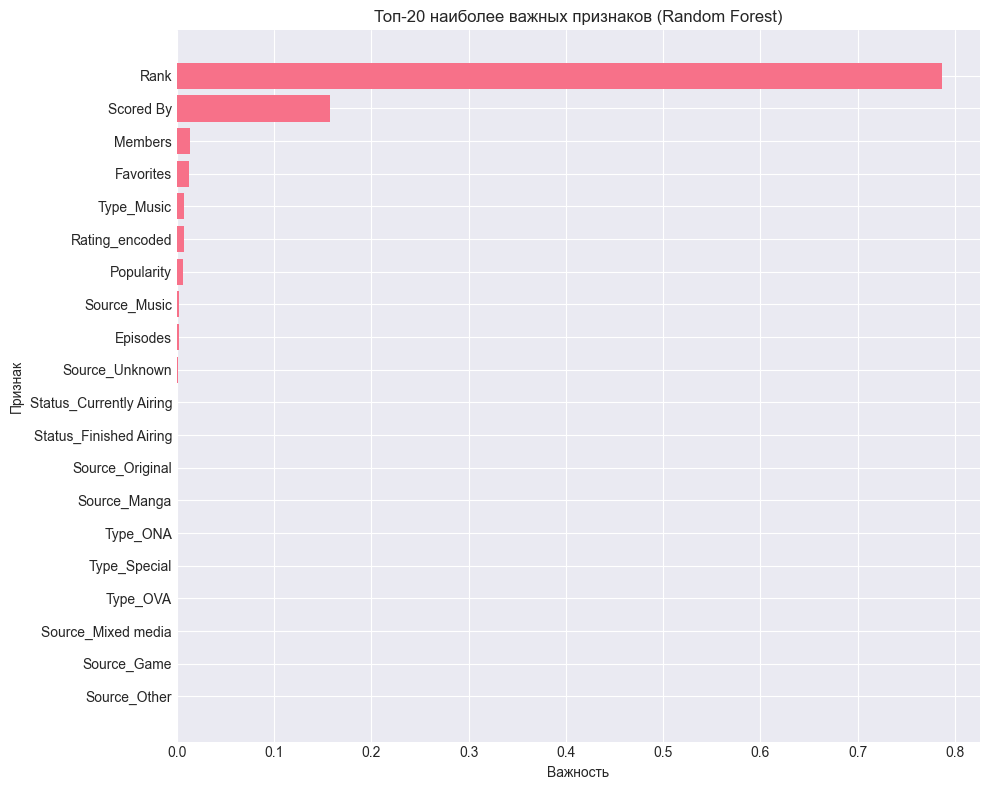

✓ График сохранен


In [25]:
# График 2: Важность признаков
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Топ-20 наиболее важных признаков (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_full.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранен")

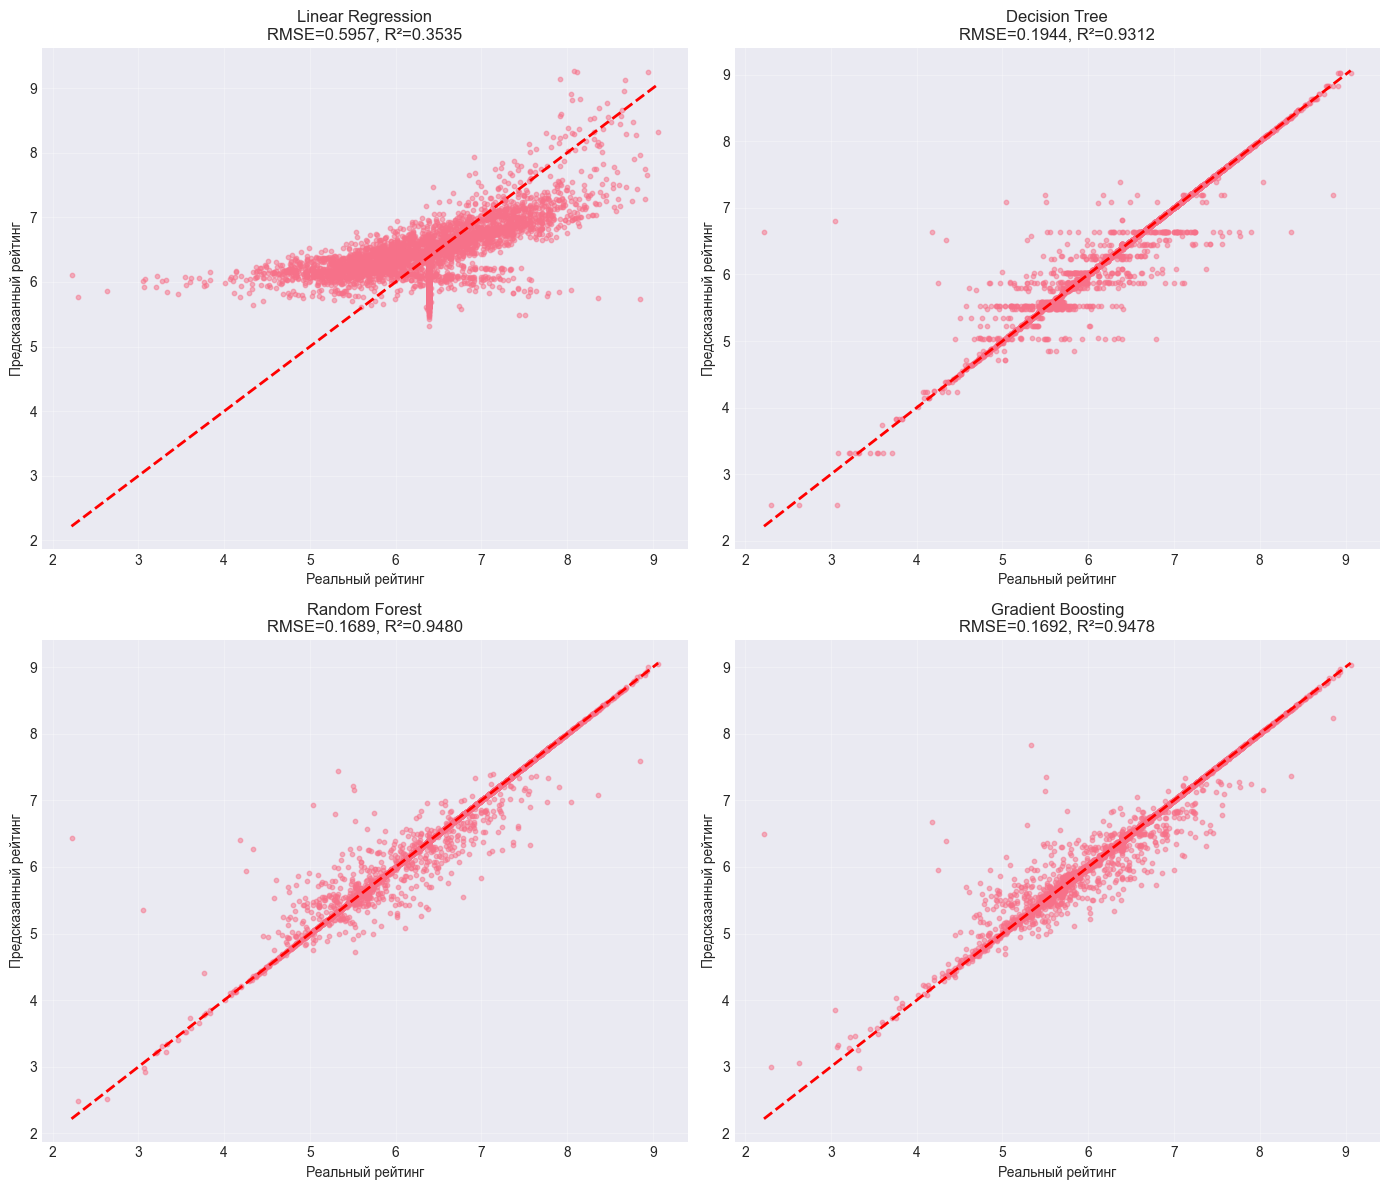

✓ График сохранен


In [26]:
# График 3: Предсказания vs реальные значения (все модели)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, (name, result) in enumerate(results.items()):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    y_pred = result['predictions']
    ax.scatter(y_test, y_pred, alpha=0.5, s=10)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Реальный рейтинг')
    ax.set_ylabel('Предсказанный рейтинг')
    ax.set_title(f'{name}\nRMSE={result["rmse_test"]:.4f}, R²={result["r2_test"]:.4f}')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('predictions_vs_actual_full.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранен")

## 12. Анализ ошибок

In [27]:
# Для лучшей модели проанализируем ошибки
best_model_name = min(results.keys(), key=lambda x: results[x]['rmse_test'])
best_predictions = results[best_model_name]['predictions']
best_errors = y_test - best_predictions

print(f"Лучшая модель: {best_model_name}")
print(f"\nСтатистика ошибок:")
print(f"  Средняя ошибка: {best_errors.mean():.4f}")
print(f"  Медианная ошибка: {best_errors.median():.4f}")
print(f"  Стандартное отклонение: {best_errors.std():.4f}")
print(f"  Минимальная ошибка: {best_errors.min():.4f}")
print(f"  Максимальная ошибка: {best_errors.max():.4f}")

Лучшая модель: Random Forest

Статистика ошибок:
  Средняя ошибка: 0.0008
  Медианная ошибка: 0.0000
  Стандартное отклонение: 0.1690
  Минимальная ошибка: -4.2212
  Максимальная ошибка: 1.2758


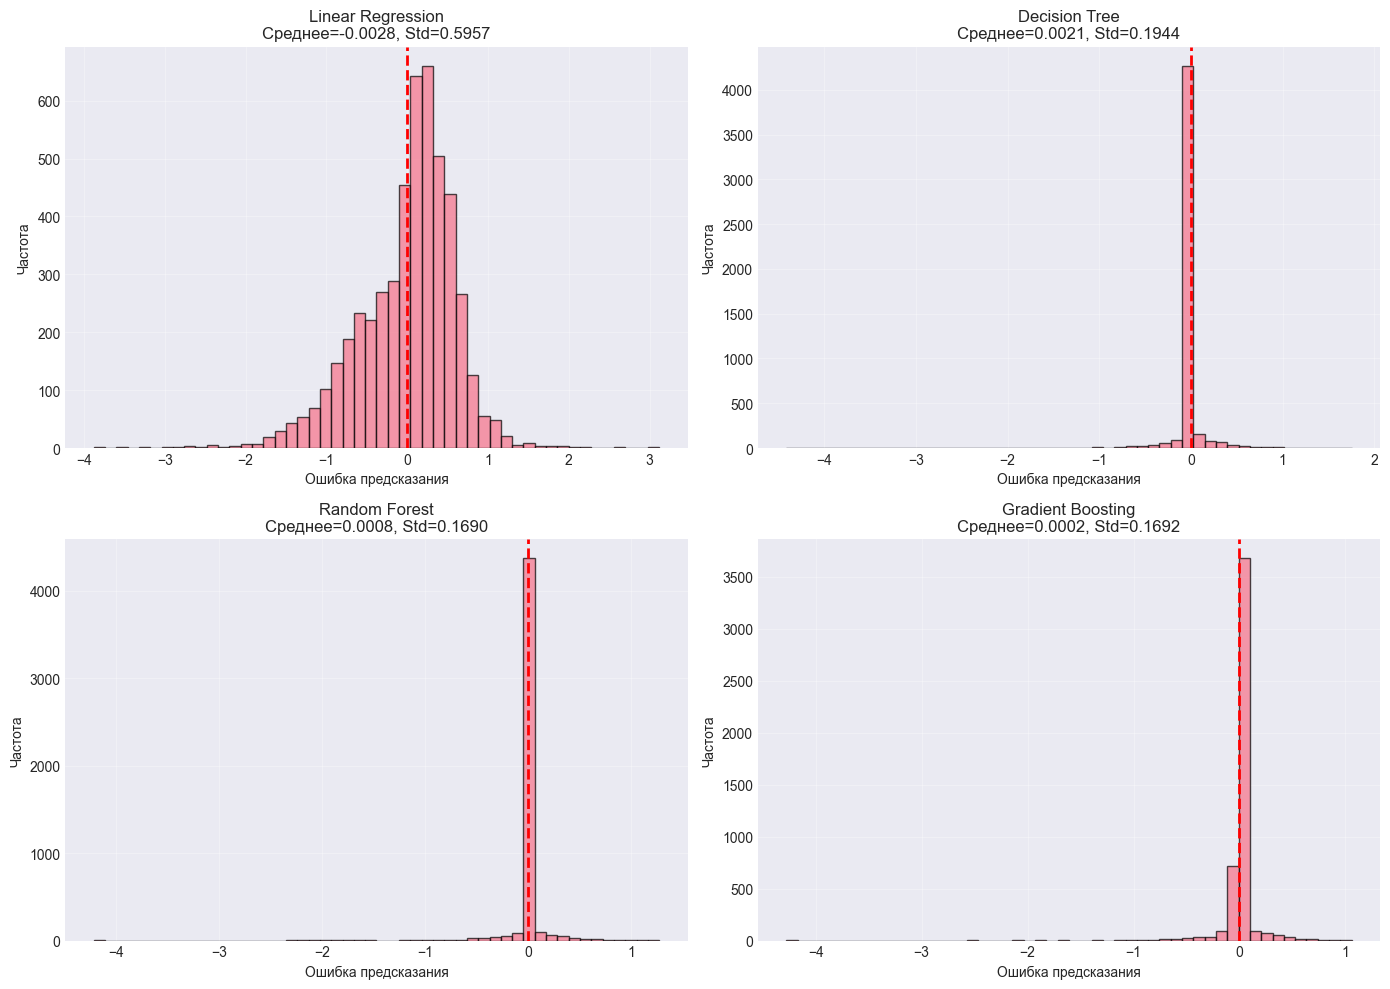

✓ График сохранен


In [28]:
# График распределения ошибок
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (name, result) in enumerate(results.items()):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    errors = y_test - result['predictions']
    ax.hist(errors, bins=50, edgecolor='black', alpha=0.7)
    ax.axvline(x=0, color='r', linestyle='--', linewidth=2)
    ax.set_xlabel('Ошибка предсказания')
    ax.set_ylabel('Частота')
    ax.set_title(f'{name}\nСреднее={errors.mean():.4f}, Std={errors.std():.4f}')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('error_distribution_full.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ График сохранен")

---

## Выводы по Эксперименту 1

### 1. Качество моделей

**Лучшая модель:** Random Forest
- **RMSE на тестовой выборке:** 0.1689 (средняя ошибка ~0.17 балла)
- **MAE:** 0.0425 (типичное отклонение ~0.04 балла)
- **R²:** 0.9480 (модель объясняет 94.8% дисперсии рейтинга)

**Результаты всех моделей:**
1. **Random Forest и Gradient Boosting** показали отличные результаты (R² > 0.94)
2. **Decision Tree** показал хорошее качество (R² = 0.93)
3. **Linear Regression** уступает ансамблевым методам (R² = 0.35)

### 2. Важность признаков

**Доминирующий признак:** Rank (78.6%)
- Признак Rank напрямую связан с Score, что создает некоторую циркулярность
- Это объясняет высокую точность модели

**Другие важные признаки:**
- Scored By (15.7%) - количество оценок
- Members (1.3%) - количество участников  
- Favorites (1.3%) - добавлений в избранное
- Type_Music (0.7%) - тип контента

### 3. Стабильность моделей

**Кросс-валидация подтверждает качество:**
- Random Forest: CV RMSE = 0.1618 ± 0.0072
- Gradient Boosting: CV RMSE = 0.1638 ± 0.0079
- Низкая дисперсия указывает на стабильность

**Отсутствие переобучения:**
- Небольшая разница между train и test метриками
- Random Forest: RMSE train=0.122 vs test=0.169

### 4. Ограничения

**Циркулярная зависимость:**
- Модель использует Rank, который сам зависит от Score
- Это завышает показатели R² и делает модель непрактичной для предсказания будущего рейтинга

**Пост-релизные метрики:**
- Favorites, Scored By, Members доступны только после выхода аниме
- Для предсказания рейтинга ДО релиза нужна другая модель (см. Эксперимент 2)

### 5. Практическое применение

**Где можно использовать:**
- Предсказание финального рейтинга на основе текущих метрик популярности
- Анализ факторов, влияющих на успешность аниме
- Мониторинг и прогнозирование динамики рейтинга

**Рекомендации:**
- Для продакшена использовать Random Forest или Gradient Boosting
- Регулярно обновлять модель на свежих данных
- Для предсказания рейтинга новых аниме см. Эксперимент 2